In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(5)


In [2]:
n = 10
arms = np.random.rand(n)
eps = 0.1

In [3]:
def reward(prob):
  reward = 0
  for i in range(10):
    if random.random() < prob:
      reward += 1
  return reward


In [5]:
av = np.array([np.random.randint(0,(n+1)),0]).reshape(1,2)


In [6]:
def bestArm(a):
    bestArm = 0
    bestMean = 0
    for u in a:
      avg = np.mean(a[np.where(a[:,0] == u[0])][:,1])
      if bestMean<avg:
        bestMean = avg
      bestArm = u[0]
    return bestArm

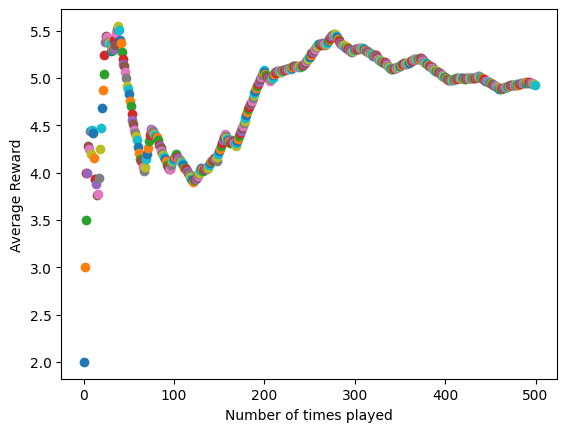

In [8]:
plt.xlabel("Number of times played")
plt.ylabel("Average Reward")
for i in range(500):
  if random.random() > eps:
    choice = bestArm(av)
    thisAV = np.array([[choice,reward(arms[choice])]])
    av = np.concatenate((av,thisAV),axis=0)
  else:
    choice = np.where(arms == np.random.choice(arms))[0][0]
    thisAV = np.array([[choice,reward(arms[choice])]])
    av = np.concatenate((av,thisAV),axis=0)
  runningMean = np.mean(av[:,1])
  plt.scatter(i,runningMean)